# PHAS0030 Assignment Week 8

Ben Elliot 21005900

This week we will be exploring the Ising model with Monte Carlo. For this simulation we will be swapping two site's spins with each other using the Metropolis algorithm.

In [1]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

### 1. Set up the initial arrangements of spins

Text(0.5, 1.0, 'Initial spins')

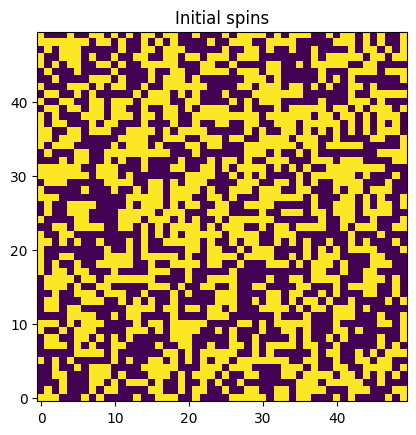

In [2]:
boxlen = 50
B_over_kT = 0
J_over_kT = 0.5
spins = (-1)**rng.integers(0,2,size=(boxlen,boxlen))

plt.imshow(spins, origin = 'lower')
plt.title('Initial spins')

### 2. Calculate the energy

In [3]:
# Create sum over neighbours
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
print("Starting energy is ",etot)

Starting energy is  -184.0


### 3. Write the swap function



In [4]:
def update_swap(spins, i1,j1,i2,j2):
    """Performs a trial update on the spin array according to ising model by swapping spins
    
    Inputs:
    spins: list of spins
    i1, j1: coordinates of particle 1
    i2, j2: coordinates of particle 2
    Returns:
    spins: updates list of spins
    de = change in energy
    

    """
    i1m1 = (i1-1)%boxlen
    i1p1 = (i1+1)%boxlen
    j1m1 = (j1-1)%boxlen
    j1p1 = (j1+1)%boxlen
    sum_neigh_spins1 = spins[i1m1,j1] + spins[i1p1,j1] + spins[i1,j1m1] + spins[i1,j1p1]
    
    i2m2 = (i2-1)%boxlen
    i2p2 = (i2+1)%boxlen
    j2m2 = (j2-1)%boxlen
    j2p2 = (j2+1)%boxlen
    sum_neigh_spins2 = spins[i2m2,j2] + spins[i2p2,j2] + spins[i2,j2m2] + spins[i2,j2p2]
    
    # The change in energy
    init_E = np.sum((sum_neigh_spins1 * spins[i1,j1])+(sum_neigh_spins2 * spins[i2,j2]))
    final_E  = np.sum((sum_neigh_spins1 * spins[i2,j2])+(sum_neigh_spins2 * spins[i1,j1]))
    de = -J_over_kT*(final_E-init_E)
    p = np.exp(-de)
    if de < 0 or rng.random() < p:
        spins[i1,j1],spins[i2,j2]= spins[i2,j2],spins[i1,j1]
    else:
            de = 0.0
    return spins, de

### Energy change in exchanged pairs

The energy of one spin is given by:

$$ E = spin_{i, j} * (-J * \Sigma \, \textit{neighbour-spins} + B) $$ 

With B = 0 and factoring out -J:

$$ E_{init} = -J(s_{i1, j1} * \Sigma \, 1  + s_{i2, j2} * \Sigma \, 2) $$

Where $\Sigma \, 1$ is the sum of spins of nearest neighbours to particle 1 and $\Sigma \, 2$ is the sum of spins of nearest neigbours to particle 2.

Energy after swapping is given by:
$$ E_{final} = -J(s_{i2, j2} * \Sigma \, 1  + s_{i1, j1} * \Sigma \, 2) $$

So energy difference by swapping pairs is given by:

$$\Delta E = E_{final} - E_{init} $$

Text(0.5, 0.98, 'Particle spins every 3000 steps')

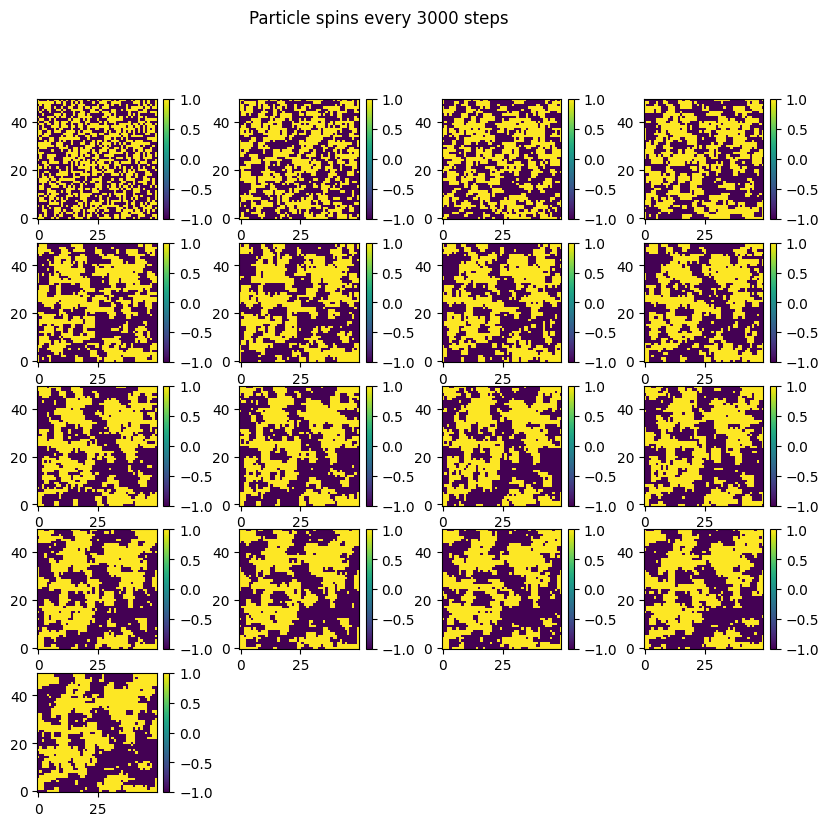

In [5]:
Nsteps = 50000
etot = np.zeros((Nsteps + 1))
# Initial energy
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot[0] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))

#Figure for plots
figIsing = plt.figure(figsize=(10,9))
index = 1
for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = rng.integers(0, boxlen, 2)
    this_i2, this_j2 = rng.integers(0, boxlen, 2)
    spins, de = update_swap(spins, this_i1,this_j1,this_i2,this_j2)
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    if i%3000==0:
        ax = figIsing.add_subplot(5,4,index)
        image = ax.imshow(spins,interpolation='none', origin='lower')
        index +=1 
        plt.colorbar(mappable=image, pad=.04, fraction=0.05)

#Add labels to plot
figIsing.suptitle("Particle spins every 3000 steps")

### 5. Show total energy


Text(0.5, 1.0, 'Total energy')

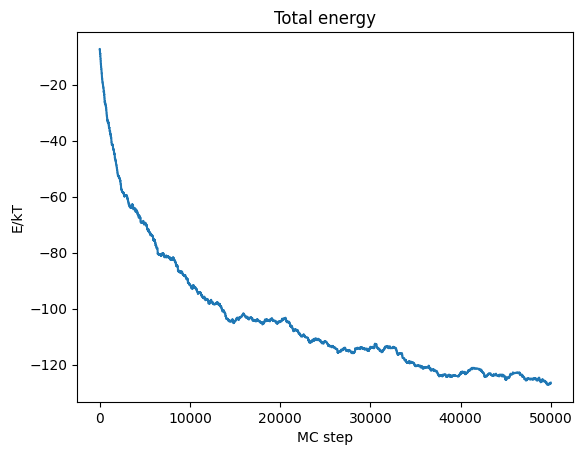

In [6]:
plt.plot(etot/(J_over_kT*len(spins)))
plt.xlabel('MC step')
plt.ylabel('E/kT')
plt.title('Total energy')

### Why we don't plot long range order parameter

We dont plot the long range order paramter (the sum over all spins) because this remains constant throughout as we just swap spins.

#### Repeating the simulation for J/kT = 1.0

Text(0.5, 1.0, 'Initial spins')

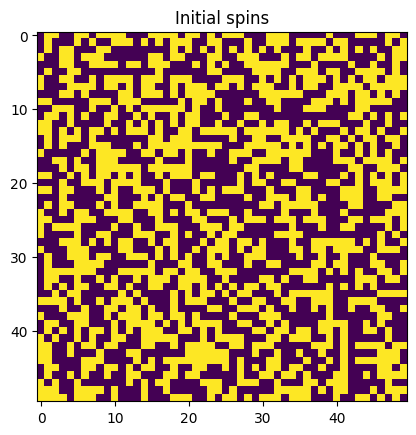

In [7]:
boxlen = 50
B_over_kT = 0
J_over_kT = 0.5
spins = (-1)**rng.integers(0,2,size=(boxlen,boxlen))

plt.imshow(spins)
plt.title('Initial spins')

Text(0.5, 0.98, 'Particle spins every 3000 steps')

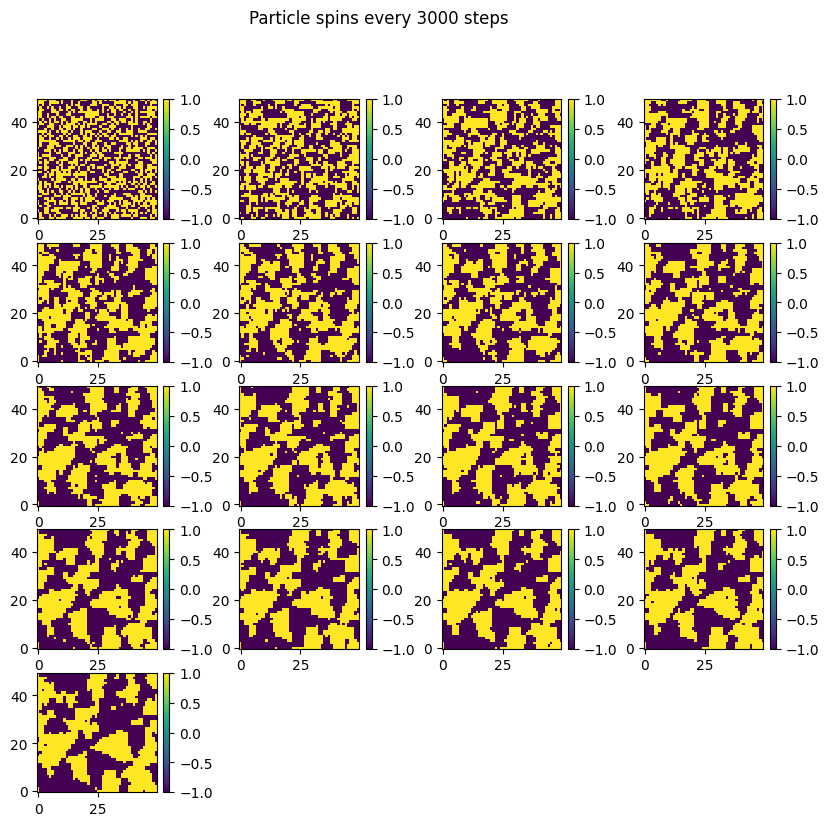

In [8]:
J_over_kT = 1.0
# Repeat simulation
Nsteps = 50000
etot = np.zeros((Nsteps + 1))
# Initial energy
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot[0] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))

#Figure for plots
figIsing = plt.figure(figsize=(10,9))
index = 1
for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = rng.integers(0, boxlen, 2)
    this_i2, this_j2 = rng.integers(0, boxlen, 2)
    spins, de = update_swap(spins, this_i1,this_j1,this_i2,this_j2)
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    if i%3000==0:
        ax = figIsing.add_subplot(5,4,index)
        image = ax.imshow(spins,interpolation='none', origin='lower')
        index +=1 
        plt.colorbar(mappable=image, pad=.04, fraction=0.05)

#Add labels to plot
figIsing.suptitle("Particle spins every 3000 steps")

Text(0.5, 1.0, 'Total energy for $\\frac{J}{k_B T} = 1$')

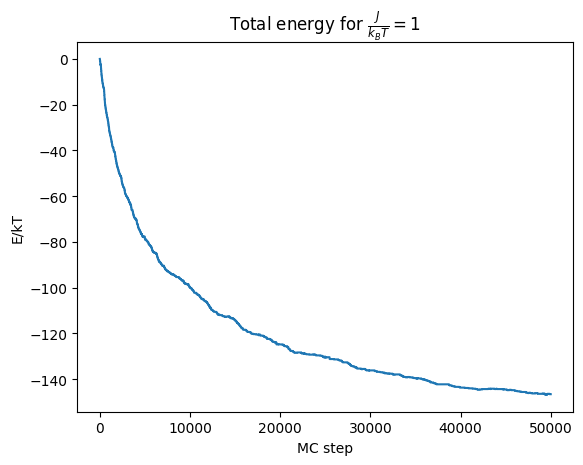

In [9]:
plt.plot(etot/(J_over_kT*len(spins)))
plt.xlabel('MC step')
plt.ylabel('E/kT')
plt.title(r'Total energy for $\frac{J}{k_B T} = 1$')

## Conclusion


From this graph we can see that changing $J/k_b T$ to 1 gives us a smoother graph towards the final energy. This might be because it makes $\Delta E$ larger making $p = e^{- \Delta E}$ smaller, meaning there is a smaller probability that the system accepts a step up in energy, so is more likely to only swap spins when the energy goes down, leading to less upward spikes.